# WASTE CLASSIFICATION USING CNN

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
pip install opencv-python tensorflow tqdm matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [10]:
train_path = "/kaggle/input/waste-classification-data/DATASET/TRAIN"
test_path = "/kaggle/input/waste-classification-data/DATASET/TEST"

In [6]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPool2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img 
from tensorflow.keras.utils import plot_model 
from glob import glob

In [8]:
from cv2 import cvtColor

In [11]:
#visualization

x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array =cv2.imread(file)
        img_array=cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data=pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 12565/12565 [02:30<00:00, 83.32it/s]


In [12]:
data.shape

(22564, 2)

In [15]:
data

,image,label
0,"[[[95, 69, 36], [97, 71, 38], [101, 75, 42], [...",R
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",R
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",R
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",R
4,"[[[99, 85, 56], [99, 85, 56], [99, 85, 56], [1...",R
...,...,...
22559,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",O
22560,"[[[4, 4, 4], [2, 2, 2], [0, 0, 0], [10, 10, 10...",O
22561,"[[[255, 255, 250], [255, 255, 250], [255, 255,...",O
22562,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",O


### THIS IS VISUALIZATION OF BAR GRAPH

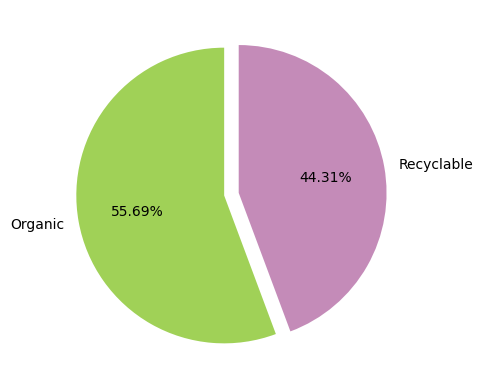

In [13]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['Organic','Recyclable'], autopct='%0.2f%%',colors=colors, startangle=90, explode=[0.05, 0.05],)
plt.show()

### THIS IS VISUALIZATION OF BAR GRAPH

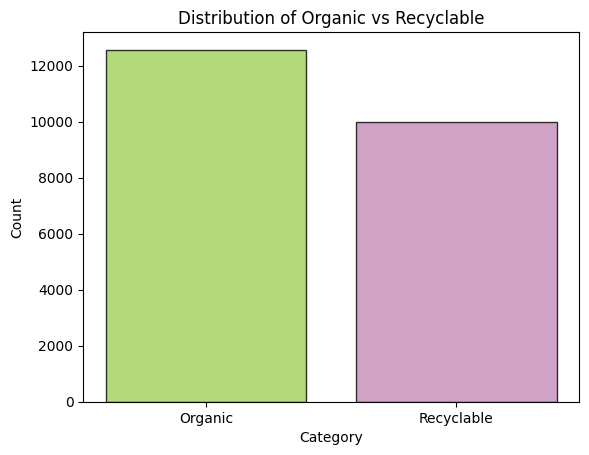

In [16]:
labels = ['Organic', 'Recyclable']
values = [data.label.value_counts()['O'], data.label.value_counts()['R']]
colors = ['#a0d157', '#c48bb8']

# Bar graph
plt.bar(labels, values, color=colors, alpha=0.8, edgecolor='black')

# Formatting
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Organic vs Recyclable')
plt.show()